In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
dataset = pd.read_csv("D:\Documents\COMP-4312-Cloud-Computing\COMP4312finalProject\data\\housing.csv")

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
dataset['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
dataset.drop(dataset[dataset['ocean_proximity'] == 'ISLAND'].index, inplace=True) #remove entries with ISLAND (outlier)
dataset=pd.get_dummies(dataset, columns=['ocean_proximity'], sparse=False, drop_first=True) #convert object to int 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20635 entries, 0 to 20639
Data columns (total 12 columns):
longitude                     20635 non-null float64
latitude                      20635 non-null float64
housing_median_age            20635 non-null float64
total_rooms                   20635 non-null float64
total_bedrooms                20428 non-null float64
population                    20635 non-null float64
households                    20635 non-null float64
median_income                 20635 non-null float64
median_house_value            20635 non-null float64
ocean_proximity_INLAND        20635 non-null uint8
ocean_proximity_NEAR BAY      20635 non-null uint8
ocean_proximity_NEAR OCEAN    20635 non-null uint8
dtypes: float64(9), uint8(3)
memory usage: 1.6 MB


In [5]:
dataset.isna().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_INLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

In [6]:
dataset['total_bedrooms'].fillna(dataset['total_bedrooms'].mean(), inplace=True) #fill nulls with total_bedroom mean

In [7]:
dataset['total_bedrooms'].isna().sum() #check that nulls were filled properly

0

In [8]:
dataset['bedrooms_per_household'] = dataset['total_bedrooms']/dataset['households']
dataset['population_per_household'] = dataset['population']/dataset['households']
dataset['rooms_per_household'] = dataset['total_rooms']/dataset['households']

In [9]:
dataset.drop(columns=['total_bedrooms', 'total_rooms'], inplace=True)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20635 entries, 0 to 20639
Data columns (total 13 columns):
longitude                     20635 non-null float64
latitude                      20635 non-null float64
housing_median_age            20635 non-null float64
population                    20635 non-null float64
households                    20635 non-null float64
median_income                 20635 non-null float64
median_house_value            20635 non-null float64
ocean_proximity_INLAND        20635 non-null uint8
ocean_proximity_NEAR BAY      20635 non-null uint8
ocean_proximity_NEAR OCEAN    20635 non-null uint8
bedrooms_per_household        20635 non-null float64
population_per_household      20635 non-null float64
rooms_per_household           20635 non-null float64
dtypes: float64(10), uint8(3)
memory usage: 1.8 MB


In [11]:
trainset, testset = train_test_split(dataset, test_size=0.3,random_state=1)
trainset.to_csv("D:\Documents\COMP-4312-Cloud-Computing\COMP4312finalProject\data\\train.csv")
testset.to_csv("D:\Documents\COMP-4312-Cloud-Computing\COMP4312finalProject\data\\test.csv")

In [12]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14444 entries, 19379 to 235
Data columns (total 13 columns):
longitude                     14444 non-null float64
latitude                      14444 non-null float64
housing_median_age            14444 non-null float64
population                    14444 non-null float64
households                    14444 non-null float64
median_income                 14444 non-null float64
median_house_value            14444 non-null float64
ocean_proximity_INLAND        14444 non-null uint8
ocean_proximity_NEAR BAY      14444 non-null uint8
ocean_proximity_NEAR OCEAN    14444 non-null uint8
bedrooms_per_household        14444 non-null float64
population_per_household      14444 non-null float64
rooms_per_household           14444 non-null float64
dtypes: float64(10), uint8(3)
memory usage: 1.3 MB


In [13]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6191 entries, 8296 to 2110
Data columns (total 13 columns):
longitude                     6191 non-null float64
latitude                      6191 non-null float64
housing_median_age            6191 non-null float64
population                    6191 non-null float64
households                    6191 non-null float64
median_income                 6191 non-null float64
median_house_value            6191 non-null float64
ocean_proximity_INLAND        6191 non-null uint8
ocean_proximity_NEAR BAY      6191 non-null uint8
ocean_proximity_NEAR OCEAN    6191 non-null uint8
bedrooms_per_household        6191 non-null float64
population_per_household      6191 non-null float64
rooms_per_household           6191 non-null float64
dtypes: float64(10), uint8(3)
memory usage: 550.2 KB


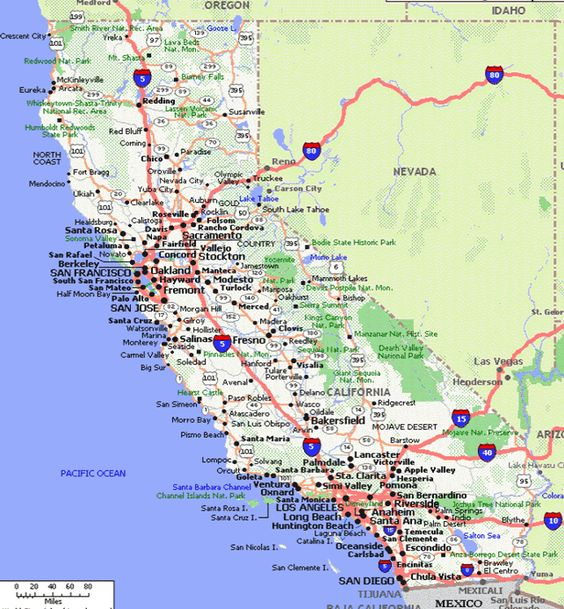

<Figure size 864x720 with 0 Axes>

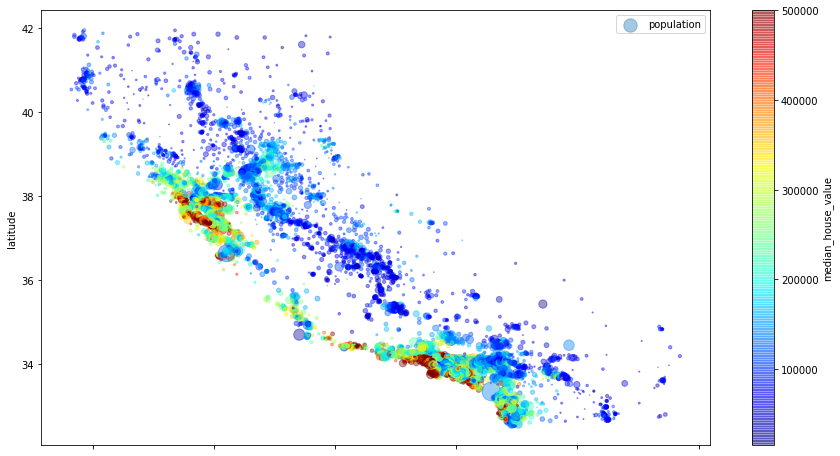

In [14]:
from IPython.display import Image
plt.figure(figsize=(12, 10))
#trainset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
#        s=trainset["population"]/100, label="population", figsize=(15,8),
#        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
#    )
dataset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=dataset["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
    )
plt.legend()
Image(filename = "Pictures/map_of_cali.jpg")

In [15]:
corr_matrix=trainset.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.689322
ocean_proximity_NEAR BAY      0.165983
rooms_per_household           0.147449
ocean_proximity_NEAR OCEAN    0.143741
housing_median_age            0.111893
households                    0.060868
population_per_household     -0.020837
population                   -0.028903
bedrooms_per_household       -0.038097
longitude                    -0.052402
latitude                     -0.137930
ocean_proximity_INLAND       -0.484145
Name: median_house_value, dtype: float64

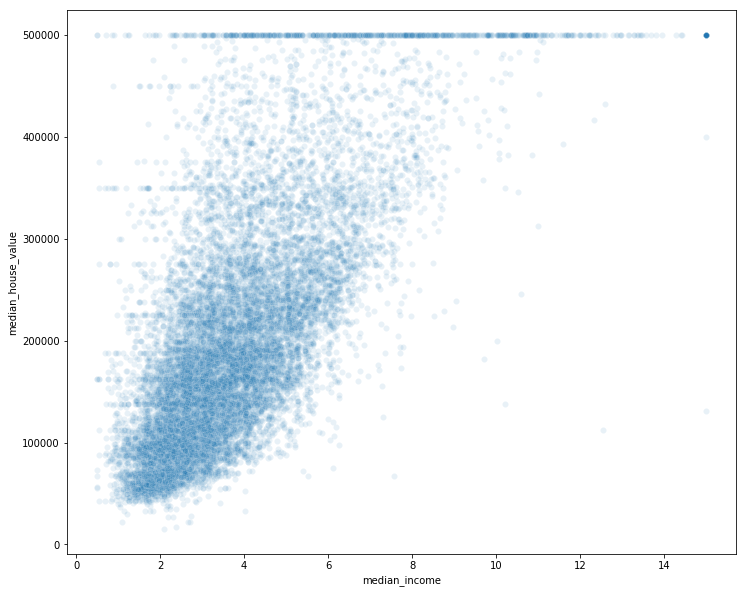

In [16]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=trainset, x="median_income", y="median_house_value", alpha=0.1)